# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

sns.set()

# Reading the Dataset

In [2]:
data = pd.read_csv('data.csv')
data.date = pd.to_datetime(data.date)
data = data.set_index('date')

data_cpy = data

# Splitting the Dataset into train and test sets.

For this dataset, a 80-20 split has been implemeted. i.e. 80% data for training and 20% for testing

- **df** is a dataframe that contains the training data.
- **df_test** is a dataframe that contains the testing data.

In [3]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

# Auto ARIMAX for SPX Market Prices
In this section we try and predict the **SPX** market prices using the default **auto_arima** model along with the exogenous variables - **DAX**, **FTSE**, and **NIKKEI**.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [4]:
model_auto_arimax = auto_arima(df.spx, exogenous = df[['dax', 'ftse', 'nikkei']])

The summary statistics of the model.

In [5]:
print(model_auto_arimax.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4921
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -21959.110
Date:                Mon, 30 Mar 2020   AIC                          43934.221
Time:                        16:59:26   BIC                          43986.229
Sample:                    07-01-1994   HQIC                         43952.464
                         - 05-10-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0338      0.018      1.888      0.059      -0.001       0.069
dax            0.0468      0.001     45.429      0.000       0.045       0.049
ftse           0.1452      0.002     95.920      0.0

### Specify a start date and an end date for predictions.

In [6]:
start_date = "2013-05-13"
end_date = "2018-01-29"

### Use the model to predict the values for the dates defined.

In [7]:
pred = pd.DataFrame(model_auto_arimax.predict(n_periods = len(df_test[start_date:end_date]), 
                    exogenous = df_test[['dax', 'ftse', 'nikkei']][start_date:end_date]),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

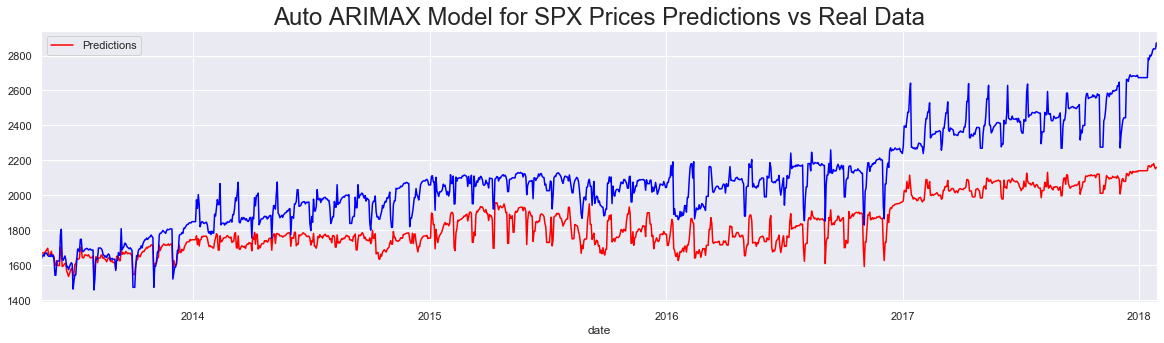

In [8]:
pred.plot(figsize = (20,5), color = "red")
df_test.spx[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMAX Model for SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [9]:
mse = mean_squared_error(df_test.spx.values, pred.values)
rmse = sqrt(mse)

print("Root Mean Squared Error: "+str(rmse))

Root Mean Squared Error: 282.9555336917499


# Auto ARIMAX for Normalized SPX Market Prices
In this section we try and predict the Normalized SPX **(spx_norm)** market prices using the default **auto_arima** model and the Normalized exogenous variables - **dax_norm**, **ftse_norm**, and **nikkei_norm**.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [10]:
model_auto_arimax_norm = auto_arima(df.spx_norm, exogenous = df[['dax_norm', 'ftse_norm', 'nikkei_norm']])

The summary statistics of the model.

In [11]:
print(model_auto_arimax_norm.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4921
Model:               SARIMAX(2, 1, 1)   Log Likelihood              -14345.872
Date:                Mon, 30 Mar 2020   AIC                          28707.745
Time:                        17:00:07   BIC                          28759.753
Sample:                    07-01-1994   HQIC                         28725.988
                         - 05-10-2013                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.0072      0.004      1.929      0.054      -0.000       0.014
dax_norm        0.2210      0.005     45.427      0.000       0.211       0.231
ftse_norm       1.0711      0.011     96.711    

### Specify a start date and an end date for predictions.

In [12]:
start_date = "2013-05-13"
end_date = "2018-01-29"

### Use the model to predict the values for the dates defined.

In [13]:
pred_norm = pd.DataFrame(model_auto_arimax_norm.predict(n_periods = len(df_test[start_date:end_date]),
                        exogenous = df_test[['dax_norm', 'ftse_norm', 'nikkei_norm']][start_date:end_date]),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

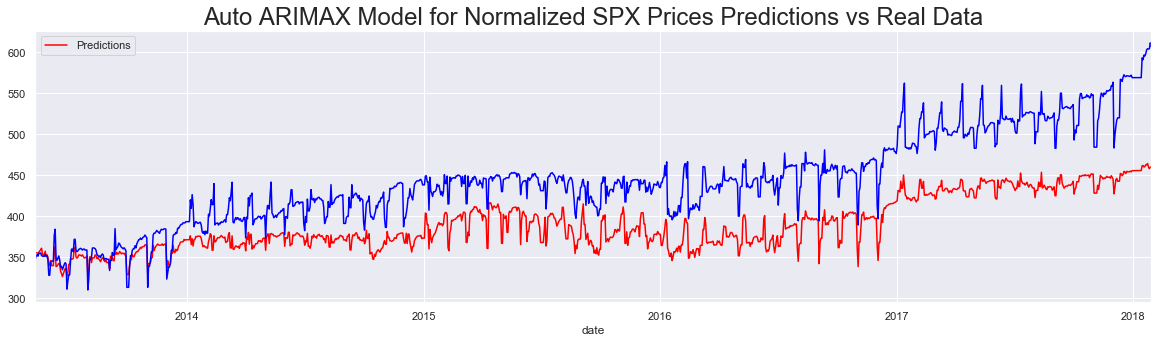

In [14]:
pred_norm.plot(figsize = (20,5), color = "red")
df_test.spx_norm[start_date:end_date].plot(color = "blue")
plt.title("Auto ARIMAX Model for Normalized SPX Prices Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [15]:
mse = mean_squared_error(df_test.spx_norm.values, pred_norm.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 60.18482748645473


# Auto ARIMAX for SPX Market Returns
In this section we try and predict the SPX market returns (**spx_ret**) using the default **auto_arima** model and the exogenous returns - **dax_ret**, **ftse_ret**, and **nikkei_ret**.

Steps:
- Build the default auto_arima model using the training dataset **df**.
- Specify a **start date** and an **end date** for predictions.
- Use the model to predict the values for the dates defined.
- Plot the model's predictions against the actual values from the test dataset **df_test**.
- Find statistical measures for the model's accuracy.

### Build the default auto_arima model using the training dataset df.

In [16]:
model_auto_arimax_ret = auto_arima(df.spx_ret[1:], exogenous = df[['dax_ret', 'ftse_ret', 'nikkei_ret']][1:])

The summary statistics of the model.

In [17]:
print(model_auto_arimax_ret.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4920
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -10376.464
Date:                Mon, 30 Mar 2020   AIC                          20768.927
Time:                        17:00:45   BIC                          20820.936
Sample:                    07-04-1994   HQIC                         20787.170
                         - 05-10-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0072      0.002      2.963      0.003       0.002       0.012
dax_ret        0.1495      0.005     28.911      0.000       0.139       0.160
ftse_ret       0.7854      0.008    101.186      0.0

### Specify a start date and an end date for predictions.

In [18]:
start_date = "2013-05-13"
end_date = "2018-01-29"

### Use the model to predict the values for the dates defined.

In [19]:
pred_ret = pd.DataFrame(model_auto_arimax_ret.predict(n_periods = len(df_test[start_date:end_date]),
                        exogenous = df_test[['dax_ret', 'ftse_ret', 'nikkei_ret']]),
                    index = df_test[start_date:end_date].index, columns=['Predictions'])

### Plot the model's predictions against the actual values from the test dataset df_test.

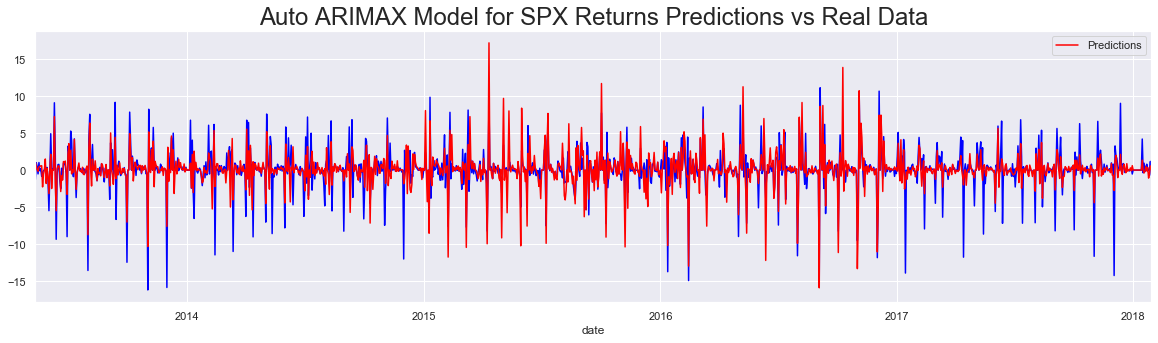

In [20]:
pred_ret.plot(figsize = (20,5), color = "red", zorder=2)
df_test.spx_ret[start_date:end_date].plot(color = "blue", zorder=1)
plt.title("Auto ARIMAX Model for SPX Returns Predictions vs Real Data", size = 24)
plt.show()

### Find statistical measures for the model's accuracy.

In [21]:
mse = mean_squared_error(df_test.spx_ret.values, pred_ret.values)
rmse = sqrt(mse)

print("Root Mean Squared Error - "+str(rmse))

Root Mean Squared Error - 2.0625255251052357
